In [ ]:
from google.colab import files
uploaded = files.upload()





Saving mmc1 (1).csv to mmc1 (1).csv


In [15]:
# Data Loading
import pandas as pd
import io
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Load the dataset

df = pd.read_csv(io.BytesIO(uploaded['mmc1 (1).csv']))

In [ ]:
# Display the first few rows of the data to understand its structure

df.head()


,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,3,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,3,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,3,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,4,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,4,0,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [ ]:
df.columns

Index(['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace',
       'bitter_tongue', 'vomitting', 'diarrhea', 'Convulsion', 'Anemia',
       'jundice', 'cocacola_urine', 'hypoglycemia', 'prostraction',
       'hyperpyrexia', 'severe_maleria'],
      dtype='object')

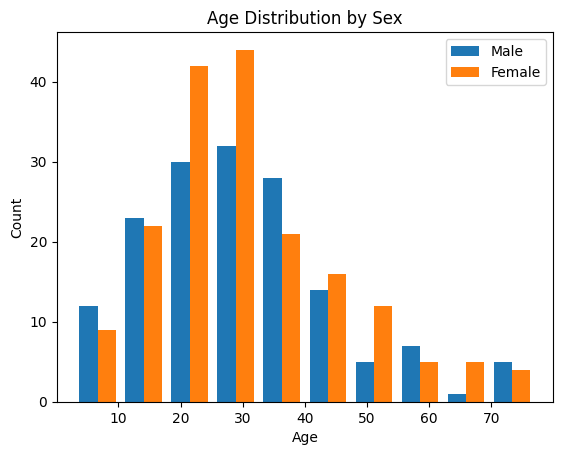

In [ ]:
# @title Age Distribution by Sex

import matplotlib.pyplot as plt

new_var = [df[df['sex'] == 0]['age'], df[df['sex'] == 1]['age']]

plt.hist(new_var, label=['Male', 'Female'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex')
_ = plt.legend()

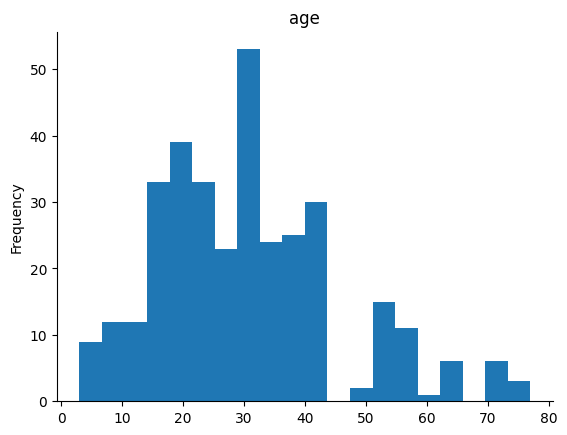

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

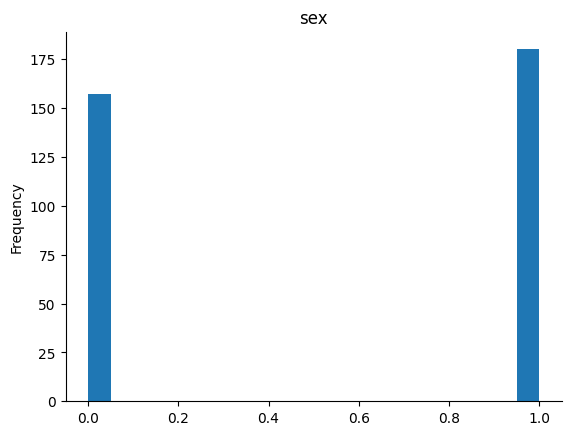

In [ ]:
# @title sex

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

  Age Group  Frequency
0      0-10         17
1     11-20         72
2     21-30         80
3     31-40         94
4     41-50         30
5     51-60         29
6     61-70          6
7     71-80          9
8     81-90          0
9    91-100          0


<ipython-input-7-2afd121d0d45>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Frequency', data=age_freq_table, palette="viridis")


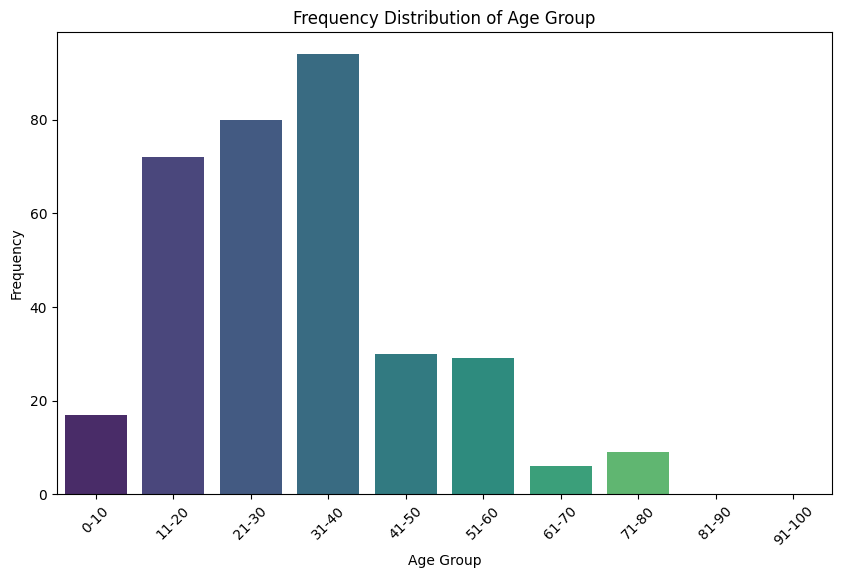

In [ ]:
# Create age bins and labels

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Use pd.cut to create age groups
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create the frequency distribution table for Age

age_freq_table = df['Age Group'].value_counts().sort_index().reset_index()
age_freq_table.columns = ['Age Group', 'Frequency']
print(age_freq_table)

# Plotting the frequency distribution of Age Group

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Frequency', data=age_freq_table, palette="viridis")
plt.title('Frequency Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

   Gender  Frequency
0       1        180
1       0        157


<ipython-input-8-b8fb35c4fadc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Frequency', data=gender_freq_table, palette="viridis")


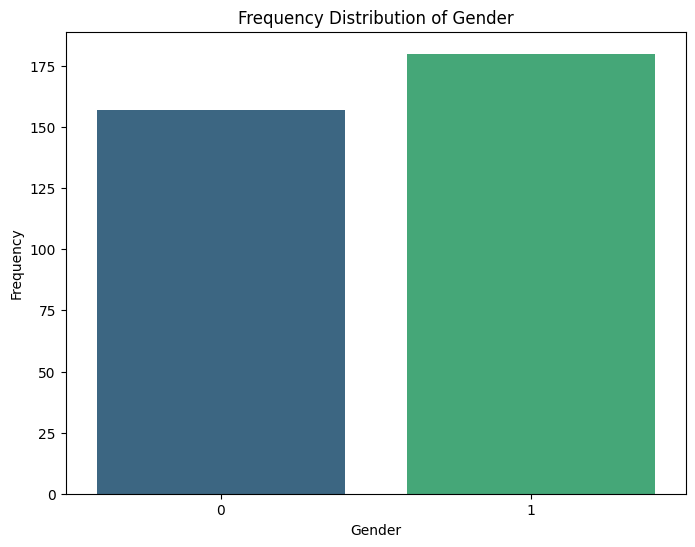

In [ ]:
# Create the frequency distribution table for Gender

gender_freq_table = df['sex'].value_counts().reset_index()
gender_freq_table.columns = ['Gender', 'Frequency']
print(gender_freq_table)

# Plotting the frequency distribution of Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Frequency', data=gender_freq_table, palette="viridis")
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Combined Frequency Distribution for Symptoms Variables:
   fever  Frequency  cold  Frequency  rigor  Frequency  fatigue  Frequency  \
0      1        253     1        191      0        222        0        174   
1      0         84     0        146      1        115        1        163   

   headace  Frequency  ...  jundice  Frequency  cocacola_urine  Frequency  \
0        1        236  ...        1        222               1        182   
1        0        101  ...        0        115               0        155   

   hypoglycemia  Frequency  prostraction  Frequency  hyperpyrexia  Frequency  
0             1        289             0        263             0        290  
1             0         48             1         74             1         47  

[2 rows x 30 columns]


<ipython-input-14-22a74c4fb8c4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symptom', y='Value', data=melted_symptoms_table, palette="viridis")


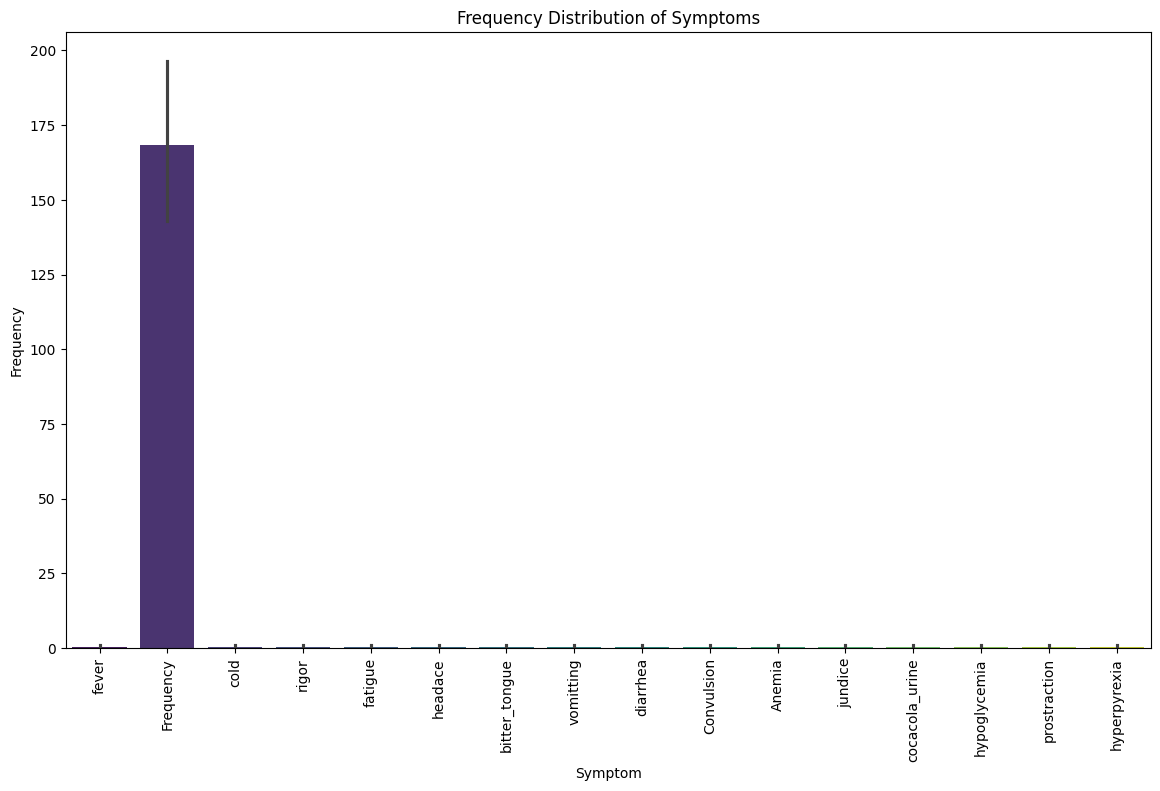

In [ ]:
# List of symptom variables

symptom_vars = ['fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter_tongue',
                'vomitting', 'diarrhea', 'Convulsion', 'Anemia', 'jundice',
                'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia']

# Create a dictionary to store frequency tables for each symptom
symptom_freq_tables = {}


# Generate frequency distribution tables for each symptom variable
for symptom in symptom_vars:
    symptom_freq_table = df[symptom].value_counts().reset_index()
    symptom_freq_table.columns = [symptom, 'Frequency']
    symptom_freq_tables[symptom] = symptom_freq_table

# Combine frequency distribution tables for symptoms variables
combined_symptoms_table = pd.concat([symptom_freq_tables[symptom] for symptom in symptom_vars], axis=1)
print("Combined Frequency Distribution for Symptoms Variables:")
print(combined_symptoms_table)

# Melt the combined symptoms frequency table for easier plotting
melted_symptoms_table = pd.melt(combined_symptoms_table, var_name='Symptom', value_name='Value')

# Plotting the combined frequency distribution of Symptoms
plt.figure(figsize=(14, 8))
sns.barplot(x='Symptom', y='Value', data=melted_symptoms_table, palette="viridis")
plt.title('Frequency Distribution of Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Data Preprocessing
# Check for missing values

df.isnull().sum()


,0
age,0
sex,0
fever,0
cold,0
rigor,0
fatigue,0
headace,0
bitter_tongue,0
vomitting,0
diarrhea,0


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Example of encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Model Fitting
# Define the dependent and independent variables

y = df['severe_maleria']  # Replace with actual dependent variable column name

X = df[['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter_tongue',
        'vomitting', 'diarrhea', 'Convulsion', 'Anemia', 'jundice', 'cocacola_urine',
        'hypoglycemia', 'prostraction', 'hyperpyrexia']]  # Replace with actual independent variables

X = sm.add_constant(X)


In [ ]:
# Fit the logistic regression model

logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.600318
         Iterations 6


In [ ]:
# Parameter Estimates

params = result.params
print(params)

const            -2.831681
age               0.012831
sex               0.076147
fever            -0.022650
cold              0.344696
rigor             0.182264
fatigue           0.266639
headace           0.795019
bitter_tongue    -0.186619
vomitting         0.033910
diarrhea          0.477736
Convulsion       -0.422979
Anemia           -0.032901
jundice           0.139141
cocacola_urine    0.377035
hypoglycemia      0.771907
prostraction     -0.603265
hyperpyrexia      0.017094
dtype: float64


In [ ]:
# Get the coefficients and standard errors
coefficients = result.params
standard_errors = result.bse

In [ ]:
# Calculate Wald statistics, p-values, and exponentiated coefficients


wald_statistics = (coefficients / standard_errors) ** 2
p_values = 1 - stats.chi2.cdf(wald_statistics, 1)
exp_coefficients = np.exp(coefficients)

# Create a table of results
results_table = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': standard_errors,
    'Wald Statistic': wald_statistics,
    'P-Value': p_values,
    'Exp(Coef)': exp_coefficients
})

# Display the results table
print(results_table)

                Coefficient  Std Error  Wald Statistic   P-Value  Exp(Coef)
const             -2.831681   0.695440       16.579411  0.000047   0.058914
age                0.012831   0.008317        2.379925  0.122903   1.012913
sex                0.076147   0.250460        0.092435  0.761104   1.079122
fever             -0.022650   0.286937        0.006231  0.937084   0.977605
cold               0.344696   0.253003        1.856176  0.173067   1.411561
rigor              0.182264   0.257160        0.502336  0.478475   1.199931
fatigue            0.266639   0.252248        1.117357  0.290488   1.305569
headace            0.795019   0.286456        7.702635  0.005514   2.214483
bitter_tongue     -0.186619   0.249913        0.557611  0.455224   0.829760
vomitting          0.033910   0.480497        0.004980  0.943738   1.034491
diarrhea           0.477736   0.254091        3.535056  0.060084   1.612419
Convulsion        -0.422979   0.261637        2.613600  0.105951   0.655093
Anemia      

In [ ]:
# Model Prediction Capability
# Fit the null model
null_model = sm.Logit(y, sm.add_constant(pd.DataFrame({'const': [1] * len(y)}))).fit()

Optimization terminated successfully.
         Current function value: 0.643791
         Iterations 4


In [ ]:
# Log-likelihoods of the null model and the full model
log_likelihood_null = null_model.llf
log_likelihood_full = result.llf

In [ ]:
# Likelihood-Ratio Test Statistic

lr_stat = -2 * (log_likelihood_null - log_likelihood_full)
df = len(params) - 1  # Degrees of freedom

# Use chi2.sf for p-value calculation
p_value_lr = chi2.sf(lr_stat, df)

In [ ]:
# Number of observations
N = len(y)

# Calculate Cox & Snell R-squared
R2_cox_snell = 1 - np.exp((2 / N) * (log_likelihood_null - log_likelihood_full))

# Calculate Nagelkerke R-squared
R2_nagelkerke = R2_cox_snell / (1 - np.exp(2 * log_likelihood_null / N))

print(f"Cox & Snell R-squared: {R2_cox_snell}")
print(f"Nagelkerke R-squared: {R2_nagelkerke}")


Cox & Snell R-squared: 0.08327409465209978
Nagelkerke R-squared: 0.11500950077131429


In [ ]:
# Results
lr_test_results = {
    'LR Statistic': lr_stat,
    'p-value': p_value_lr,

}

print(lr_test_results)

{'LR Statistic': 29.301056455820003, 'p-value': 0.03184896934485778}


In [ ]:
# Group target varibles
target_vars = ['headace','diarrhea','hypoglycemia','prostraction']

df_targets = df[target_vars]



In [17]:
# Define predictor variables (X) and target variable (y)
X = df.drop(columns = target_vars)  # 'target_vars' is the target variable
y = df[target_vars]


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Fit the logistic regression model
model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)



# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [24]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')


In [26]:
roc_auc = []
for i in range(len(y_pred_proba)):
    roc_auc.append(roc_auc_score(y_test.iloc[:, i], y_pred_proba[i][:, 1], average='micro'))
roc_auc = np.mean(roc_auc)


In [27]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.3137254901960784
Precision: 0.7523364485981309
Recall: 0.7703349282296651
F1 Score: 0.7612293144208038
ROC AUC: 0.5377838391068536
